# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**.

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [4]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [5]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [6]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

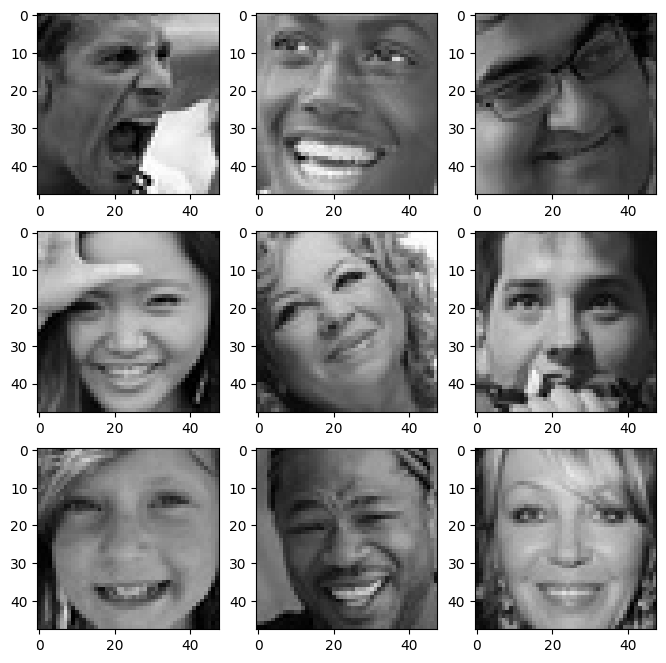

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Sad**

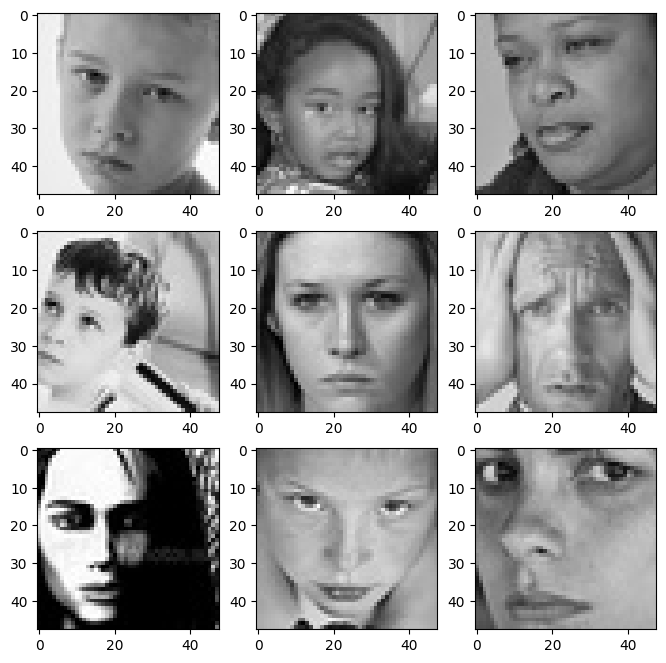

In [ ]:
# Write your code to visualize images from the class 'sad'.
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Neutral**

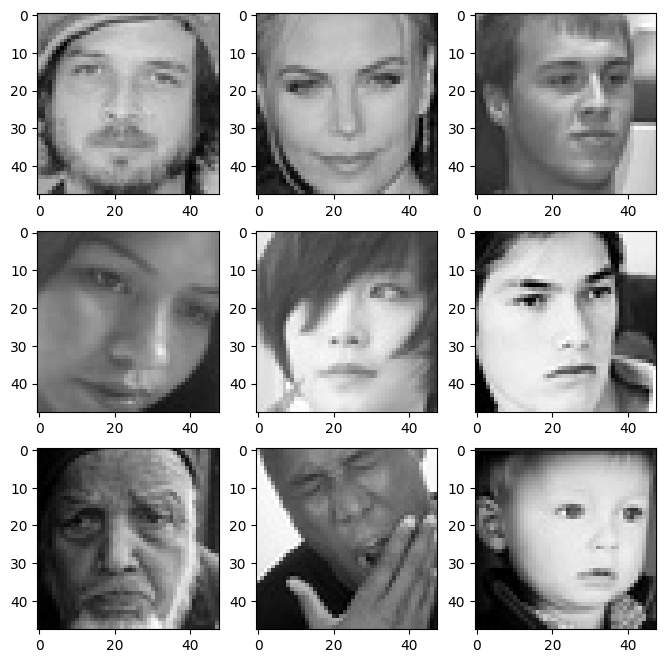

In [ ]:
# Write your code to visualize images from the class 'neutral'.
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Surprised**

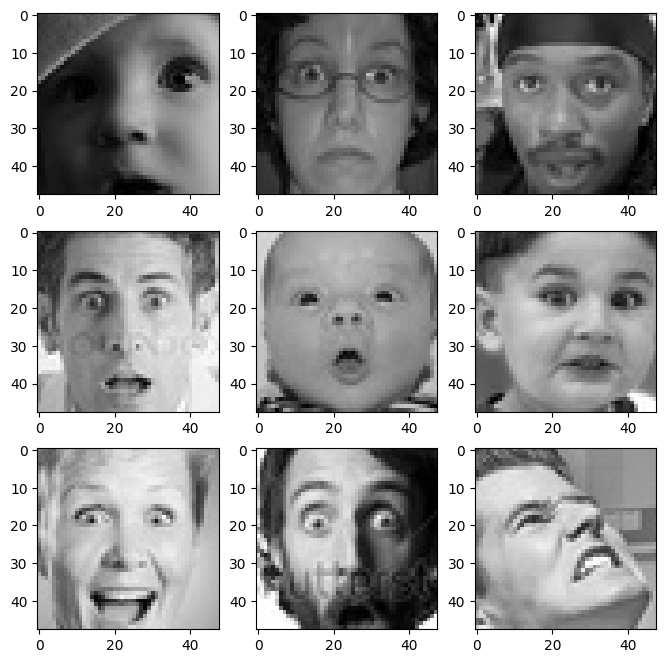

In [ ]:
# Write your code to visualize images from the class 'surprise'.
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'sad':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'sad':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'sad':    3978
Number of images in the class 'sad':    3173


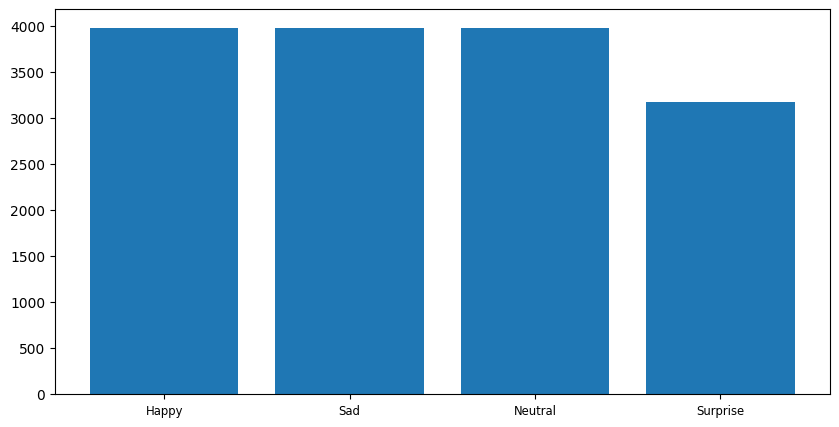

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:__**

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   brightness_range=(0.,2.),
                                   rescale=1./255,
                                   shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (img_size, img_size),
                                                        color_mode = 'grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale=1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

rgb_datagen_train = ImageDataGenerator(horizontal_flip = True,
                                       brightness_range=(0.,2.),
                                       rescale=1./255,
                                       shear_range=0.3)

rgb_train_set = rgb_datagen_train.flow_from_directory(folder_path + "train",
                                                      target_size = (img_size, img_size),
                                                      color_mode = 'rgb',
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical',
                                                      shuffle = True)


rgb_datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                            brightness_range=(0.,2.),
                                            rescale=1./255,
                                            shear_range=0.3)

rgb_validation_set = rgb_datagen_validation.flow_from_directory(folder_path + "validation",
                                                                target_size = (img_size, img_size),
                                                                color_mode = 'rgb',
                                                                batch_size = batch_size,
                                                                class_mode = 'categorical',
                                                                shuffle = True)


rgb_datagen_test = ImageDataGenerator(horizontal_flip = True,
                                      brightness_range=(0.,2.),
                                      rescale=1./255,
                                      shear_range=0.3)

rgb_test_set = rgb_datagen_test.flow_from_directory(folder_path + "test",
                                                    target_size = (img_size, img_size),
                                                    color_mode = 'rgb',
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [ ]:
def build_base_model(color_mode='grayscale'):
  input_shape = (48, 48, 1) if color_mode == 'grayscale' else (48, 48, 3)

  # Initializing a Sequential Model
  model = Sequential()

  # Add the first Convolutional block
  model.add(Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Add the second Convolutional block
  model.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Add the third Convolutional block
  model.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Add the Flatten layer
  model.add(Flatten())

  # Add the first Dense layer
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.4))

  # Add the Final layer
  model.add(Dense(4, activation='softmax'))

  return model

model1 = build_base_model()
print('Summary of model1 with grayscale setting: ')
model1.summary()

model1_rgb = build_base_model('rgb')
print('Summary of model1 with rgb setting: ')
model1_rgb.summary()

Summary of model1 with grayscale setting: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (D

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

### **grayscale**

In [ ]:
# Write your code to compile your model1. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history = model1.fit(train_set, epochs=20, validation_data=validation_set)

Epoch 1/20
473/473 [==============================] - 99s 206ms/step - loss: 1.3649 - accuracy: 0.3011 - val_loss: 1.2756 - val_accuracy: 0.4137
Epoch 2/20
473/473 [==============================] - 95s 201ms/step - loss: 1.2260 - accuracy: 0.4458 - val_loss: 1.1283 - val_accuracy: 0.5274
Epoch 3/20
473/473 [==============================] - 100s 210ms/step - loss: 1.1369 - accuracy: 0.4952 - val_loss: 1.0807 - val_accuracy: 0.5282
Epoch 4/20
473/473 [==============================] - 97s 206ms/step - loss: 1.0866 - accuracy: 0.5224 - val_loss: 1.0097 - val_accuracy: 0.5720
Epoch 5/20
473/473 [==============================] - 97s 206ms/step - loss: 1.0532 - accuracy: 0.5426 - val_loss: 0.9948 - val_accuracy: 0.5750
Epoch 6/20
473/473 [==============================] - 105s 222ms/step - loss: 1.0270 - accuracy: 0.5536 - val_loss: 0.9656 - val_accuracy: 0.5911
Epoch 7/20
473/473 [==============================] - 96s 202ms/step - loss: 1.0113 - accuracy: 0.5632 - val_loss: 0.9553 - val_

### **rgb**

In [ ]:
# Write your code to compile your model1. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1_rgb.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history_rgb = model1_rgb.fit(rgb_train_set, epochs=20, validation_data=rgb_validation_set)

Epoch 1/20
473/473 [==============================] - 114s 239ms/step - loss: 1.3698 - accuracy: 0.2971 - val_loss: 1.3077 - val_accuracy: 0.3524
Epoch 2/20
473/473 [==============================] - 105s 221ms/step - loss: 1.2698 - accuracy: 0.4014 - val_loss: 1.1975 - val_accuracy: 0.4836
Epoch 3/20
473/473 [==============================] - 116s 245ms/step - loss: 1.1954 - accuracy: 0.4645 - val_loss: 1.1019 - val_accuracy: 0.5254
Epoch 4/20
473/473 [==============================] - 113s 238ms/step - loss: 1.1266 - accuracy: 0.5029 - val_loss: 1.0300 - val_accuracy: 0.5700
Epoch 5/20
473/473 [==============================] - 113s 240ms/step - loss: 1.0771 - accuracy: 0.5278 - val_loss: 1.0184 - val_accuracy: 0.5758
Epoch 6/20
473/473 [==============================] - 116s 245ms/step - loss: 1.0389 - accuracy: 0.5491 - val_loss: 1.0146 - val_accuracy: 0.5777
Epoch 7/20
473/473 [==============================] - 114s 242ms/step - loss: 1.0097 - accuracy: 0.5626 - val_loss: 0.9393 -

### **Evaluating the Model on the Test Set**

In [ ]:
# Write your code to evaluate your model on test data.
test_loss, test_acc = model1.evaluate(test_set)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

4/4 [==============================] - 0s 69ms/step - loss: 0.8677 - accuracy: 0.6562
Test Loss: 0.8676772713661194
Test Accuracy: 0.65625


In [ ]:
# Write your code to evaluate your model on test data.
rgb_test_loss, rgb_test_acc = model1_rgb.evaluate(rgb_test_set)

print('Test Loss:', rgb_test_loss)
print('Test Accuracy:', rgb_test_acc)

4/4 [==============================] - 0s 62ms/step - loss: 0.7920 - accuracy: 0.6641
Test Loss: 0.7920366525650024
Test Accuracy: 0.6640625


**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [ ]:
def build_model(color_mode='grayscale'):
    input_shape = (48, 48, 3) if color_mode=='rgb' else (48, 48, 1)

    model = Sequential(name="Convolutional_Model_" + color_mode)
    # Add the first Convolutional block
    model.add(Conv2D(256, (2, 2), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add the second Convolutional block
    model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add the third Convolutional block
    model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add the fourth Convolutional block
    model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add the Flatten layer
    model.add(Flatten())

    # Adding the Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(4, activation='softmax'))

    return model

# Build model
model2 = build_model()

# Print model summary
model2.summary()

model2_rgb = build_model(color_mode = 'rgb')
model2_rgb.summary()

Model: "Convolutional_Model_grayscale"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                               min_delta = 0,
                               patience = 3,
                               verbose = 1,
                               restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'.
model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
history = model2.fit(train_set, validation_data=validation_set, epochs=20)

Epoch 1/20
473/473 [==============================] - 625s 1s/step - loss: 1.2394 - accuracy: 0.4119 - val_loss: 1.3606 - val_accuracy: 0.3810
Epoch 2/20
473/473 [==============================] - 657s 1s/step - loss: 1.0579 - accuracy: 0.5282 - val_loss: 1.0775 - val_accuracy: 0.5373
Epoch 3/20
473/473 [==============================] - 655s 1s/step - loss: 0.9547 - accuracy: 0.5837 - val_loss: 0.9496 - val_accuracy: 0.5996
Epoch 4/20
473/473 [==============================] - 683s 1s/step - loss: 0.8897 - accuracy: 0.6158 - val_loss: 0.8780 - val_accuracy: 0.6261
Epoch 5/20
473/473 [==============================] - 685s 1s/step - loss: 0.8441 - accuracy: 0.6396 - val_loss: 0.8797 - val_accuracy: 0.6333
Epoch 6/20
473/473 [==============================] - 649s 1s/step - loss: 0.8061 - accuracy: 0.6597 - val_loss: 0.8343 - val_accuracy: 0.6602
Epoch 7/20
473/473 [==============================] - 642s 1s/step - loss: 0.7815 - accuracy: 0.6690 - val_loss: 0.8177 - val_accuracy: 0.6542

In [ ]:
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'.
model2_rgb.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history_rgb = model2_rgb.fit(rgb_train_set, validation_data=rgb_validation_set, epochs=20)

Epoch 1/20
473/473 [==============================] - 634s 1s/step - loss: 1.2715 - accuracy: 0.3949 - val_loss: 1.2280 - val_accuracy: 0.4625
Epoch 2/20
473/473 [==============================] - 633s 1s/step - loss: 1.0630 - accuracy: 0.5284 - val_loss: 1.0797 - val_accuracy: 0.5126
Epoch 3/20
473/473 [==============================] - 635s 1s/step - loss: 0.9692 - accuracy: 0.5799 - val_loss: 0.9839 - val_accuracy: 0.5718
Epoch 4/20
473/473 [==============================] - 636s 1s/step - loss: 0.9085 - accuracy: 0.6074 - val_loss: 0.9195 - val_accuracy: 0.6190
Epoch 5/20
473/473 [==============================] - 638s 1s/step - loss: 0.8682 - accuracy: 0.6298 - val_loss: 0.8741 - val_accuracy: 0.6325
Epoch 6/20
473/473 [==============================] - 636s 1s/step - loss: 0.8262 - accuracy: 0.6497 - val_loss: 0.8672 - val_accuracy: 0.6345
Epoch 7/20
473/473 [==============================] - 601s 1s/step - loss: 0.7973 - accuracy: 0.6616 - val_loss: 0.9261 - val_accuracy: 0.6084

### **Evaluating the Model on the Test Set**

In [ ]:
# Write your code to evaluate model's test performance
# Write your code to evaluate your model on test data.
test_loss, test_acc = model2.evaluate(test_set)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

4/4 [==============================] - 2s 574ms/step - loss: 0.7585 - accuracy: 0.7188
Test Loss: 0.758539617061615
Test Accuracy: 0.71875


In [ ]:
# Write your code to evaluate your model on test data.
rgb_test_loss, rgb_test_acc = model2_rgb.evaluate(rgb_test_set)

print('Test Loss:', rgb_test_loss)
print('Test Accuracy:', rgb_test_acc)

4/4 [==============================] - 1s 263ms/step - loss: 0.6914 - accuracy: 0.7344
Test Loss: 0.6913654804229736
Test Accuracy: 0.734375


**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [6]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (img_size, img_size),
                                                        color_mode = 'rgb',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                        shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale=1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [8]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

### **Compiling and Training the VGG16 Model**

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [11]:
# Write your code to compile the vggmodel. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'.
vggmodel.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [12]:
history = vggmodel.fit(train_set, validation_data = validation_set, epochs = epochs)

Epoch 1/20
473/473 [==============================] - 660s 1s/step - loss: 1.3208 - accuracy: 0.3880 - val_loss: 1.2415 - val_accuracy: 0.4217
Epoch 2/20
473/473 [==============================] - 659s 1s/step - loss: 1.2186 - accuracy: 0.4368 - val_loss: 1.2881 - val_accuracy: 0.4055
Epoch 3/20
473/473 [==============================] - 658s 1s/step - loss: 1.1935 - accuracy: 0.4595 - val_loss: 1.1810 - val_accuracy: 0.4647
Epoch 4/20
473/473 [==============================] - 656s 1s/step - loss: 1.1707 - accuracy: 0.4703 - val_loss: 1.1416 - val_accuracy: 0.4888
Epoch 5/20
473/473 [==============================] - 607s 1s/step - loss: 1.1588 - accuracy: 0.4713 - val_loss: 1.1607 - val_accuracy: 0.4836
Epoch 6/20
473/473 [==============================] - 661s 1s/step - loss: 1.1514 - accuracy: 0.4839 - val_loss: 1.1699 - val_accuracy: 0.4876
Epoch 7/20
473/473 [==============================] - 655s 1s/step - loss: 1.1383 - accuracy: 0.4961 - val_loss: 1.1257 - val_accuracy: 0.5073

### **Evaluating the VGG16 model**

In [13]:
# Write your code to evaluate model performance on the test set
test_loss, test_acc = vggmodel.evaluate(test_set)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

4/4 [==============================] - 3s 822ms/step - loss: 1.1280 - accuracy: 0.5078
Test Loss: 1.1279757022857666
Test Accuracy: 0.5078125


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [14]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                       

### **Model Building**

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. You can scroll down in the model summary and look for 'conv5_block3_add'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [17]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Add classification layers on top of it

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)  # Write your code here. You may play around with the hyperparameters if you wish.


reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001) # Write your code here. You may play around with the hyperparameters if you wish.

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [19]:
# Write your code to compile your resnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
resnetmodel.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = resnetmodel.fit(train_set, validation_data=validation_set, epochs=epochs)

Epoch 1/10
473/473 [==============================] - 428s 886ms/step - loss: 1.4736 - accuracy: 0.2555 - val_loss: 1.4846 - val_accuracy: 0.1601
Epoch 2/10
473/473 [==============================] - 453s 958ms/step - loss: 1.4066 - accuracy: 0.2620 - val_loss: 1.3616 - val_accuracy: 0.3667
Epoch 3/10
473/473 [==============================] - 421s 890ms/step - loss: 1.3998 - accuracy: 0.2579 - val_loss: 1.4121 - val_accuracy: 0.2443
Epoch 4/10
473/473 [==============================] - 471s 996ms/step - loss: 1.3972 - accuracy: 0.2606 - val_loss: 1.3697 - val_accuracy: 0.3667
Epoch 5/10
473/473 [==============================] - 411s 868ms/step - loss: 1.3918 - accuracy: 0.2632 - val_loss: 1.3587 - val_accuracy: 0.3667
Epoch 6/10
473/473 [==============================] - 408s 863ms/step - loss: 1.3904 - accuracy: 0.2610 - val_loss: 1.3735 - val_accuracy: 0.2443
Epoch 7/10
473/473 [==============================] - 456s 965ms/step - loss: 1.3903 - accuracy: 0.2606 - val_loss: 1.3691 -

### **Evaluating the ResNet Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
# Write your code to evaluate model performance on the test set
test_loss, test_accuracy = resnetmodel.evaluate(test_set)

print('Test Loss:', test_loss)
print('\nTest accuracy:', test_accuracy)

4/4 [==============================] - 4s 969ms/step - loss: 1.4053 - accuracy: 0.2500
Test Loss: 1.4053454399108887

Test accuracy: 0.25


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [2]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 2s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

### **Model Building**

**Build your own Architecture on top of the transfer layer. Be sure to have a Flatten layer after your transfer layer and also make sure you have 4 neurons and softmax activation function in your last dense layer**

In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation='softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = _________  # Write your code here. You may play around with the hyperparameters if you wish.

reduce_learningrate = _________  # Write your code here. You may play around with the hyperparameters if you wish.

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

In [ ]:
# Write your code to compile your Efficientnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.

In [ ]:
history = # Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Write your code to evaluate the model performance on the test set

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = # Write your code here

validation_set = # Write your code here

datagen_test = # Write your code here

test_set = # Write your code here

### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [ ]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
____________

# Add 2nd CNN Block
____________

# Add 3rd CNN Block
____________

# Add 4th CNN Block
____________

# Add 5th CNN Block
____________

model3.add(Flatten())

# First fully connected layer
____________

# Second fully connected layer
____________

model3.add(Dense(no_of_classes, activation = 'softmax'))

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [ ]:
# Write your code to compile your model3. Use categorical crossentropy as the loss function, Adam Optimizer with 0.003 learning rate, and set metrics to 'accuracy'.

In [ ]:
history = # Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train your model for 35 epochs.

### **Evaluating the Model on Test Set**

In [ ]:
# Write your code to evaluate the model performance on the test set

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = ________.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
_____________

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?